## The complex sinusoid and phasors
This notebook explores the notion of how we use the complex sinusoid and phasors to represent audio signals.

Firstly let us import several of the packages we will need. If these packages are not available on your machine, you will have to install them first. 


In [ ]:
%pip install ipympl
import numpy as np 
from  matplotlib import patches 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from matplotlib import animation
from ipywidgets import widgets # interactive plots
import IPython
from IPython.display import Audio, Image, HTML
%matplotlib ipympl

controls_css = """
<style>
.anim-controls button {
    font-size: 4px !important;
    padding: 2px 10px !important;
}
.anim-controls {
    margin-top: 4px;
}
</style>
"""

### The complex sinusoid

The complex sinusoid is given by the following function

$\begin{equation*}
f(t) = e^{j\omega t}
\end{equation*}$

where $t$ is the time (seconds), and $\omega$ is referred to as the angular frequency (radians/second) which is defined as

$\begin{equation}
\omega = 2 \pi f
\end{equation}$

where $f$ is the frequency (Hz).

If we recall [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula) from the notebook on complex numbers, then we can deduce that the complex exponential can also be expressed as (we simply let $\theta$ from the notebook on complex numbers be defined as $\theta = \omega t$)

$\begin{equation}
e^{j\omega t} = \cos(\omega t) + jsin(\omega t)
\end{equation}$

So the complex exponential $e^{j\omega t}$ has a real part of $\cos(\omega t)$ and an imaginary part of $\sin(\omega t)$. When we discussed Euler's identity in the notebook on complex numbers, we also saw that the exponential form of the complex number, which is identitcal to this complex exponential will correspond to a complex number that lies on the unit circle, and can be decomposed into a component on the real axis (the $\cos(\omega t)$ term) and another component on the imaginary axis (the $\sin(\omega t)$ term).

Let's refresh your memory by taking a look at the plot below. We'll make an interactive plot where $t$ is a variable where we can change. For a given frequency, as you move the slider through time, how does the complex exponential change and its corresponding real and imaginary parts? 

Move the slider to see how the complex exponential changes over time (seconds)


interactive(children=(FloatSlider(value=0.0, description='t', max=40.0, step=0.001), Output()), _dom_classes=(…

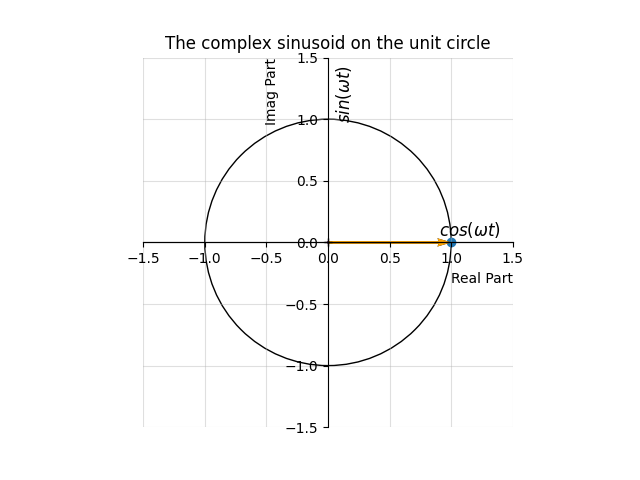

In [ ]:
# You can change this value and re-run the cell to see how things change as well.
f = 0.1 # frequency in Hz

# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none") # This is for plotting the unit circle

# Setting up figure
fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.add_patch(UnitCircle) 
ax.plot(xO,yO,'k+')
ax.set_aspect('equal')

cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qr = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qi = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='purple') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.text(1, 0, "$ cos(\omega t)$", fontsize=12,position=(1-0.1,0.05))
ax.text(0, 1, "$ sin(\omega t)$", fontsize=12,rotation = 90, position=(0.05,1))

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')
ax.set_title('The complex sinusoid on the unit circle')
    
    
# Create the interactive plot
def update(t = 0): # in the brackets here is the initial value of the variable you want to put on the slider
    
    omega = 2*np.pi*f # Angular frequency (rad/s)
    theta = omega*t

    z = np.exp(1j*theta) # Define the complex exponential
    
    # These update the plots
    #cn.set_data(z.real, z.imag)
    cn.set_offsets([z.real, z.imag])
    qc.set_UVC(z.real, z.imag)
    qr.set_UVC(z.real, 0)
    qi.set_UVC(0, z.imag)
    fig.canvas.draw_idle()

print('Move the slider to see how the complex exponential changes over time (seconds)')
slider1 = widgets.FloatSlider(min=0, max=40, step=0.001, value=0, description='time:', layout=widgets.Layout(width='500'))
slider1.style.description_width = '120px'

widgets.interact(update, t=slider1)
plt.show()


# These commands are just decorations on the plot 
ax.set_xlim([-1.5, 1.5]) # sets x and y limits of the plot 
ax.set_ylim([-1.5, 1.5])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')



### Relation to sinusoidal waveforms

Okay this is pretty interesting, we see that over time, the complex exponential goes in an anti-clockwise direction around the unit circle. We also note that the real and imaginary parts, i.e. cosine and sine components are also changing, but in a periodic manner. In other words we see that the cosine and sine components are always going between 1 and -1 with zero as the centre point. 

This brings us to another beautiful geometric interpretation of the complex exponential and how the real and imaginary components are indeed cosine and sine waveforms respectively with angular frequency of $\omega$, and hence fundamental frequency of $f$ and therefore period $1/f$ (seconds). 

In the cell below we will make an animation to visualize all of this. The animation runs over time in seconds. As you will see the complex exponential travels around the unit circle in an anti-clockwise direction and the corresponding real and imaginary parts are mapped to cosine and sine waves respectively. 

Try to change the frequency of the complex exponential and see how things change. You can also try to manipulate the $\omega t$ argument in other ways such as including a negative sign to also see how things change. Take some time to look at these animations, play around with them and connect them to the equations that were previously shown. 

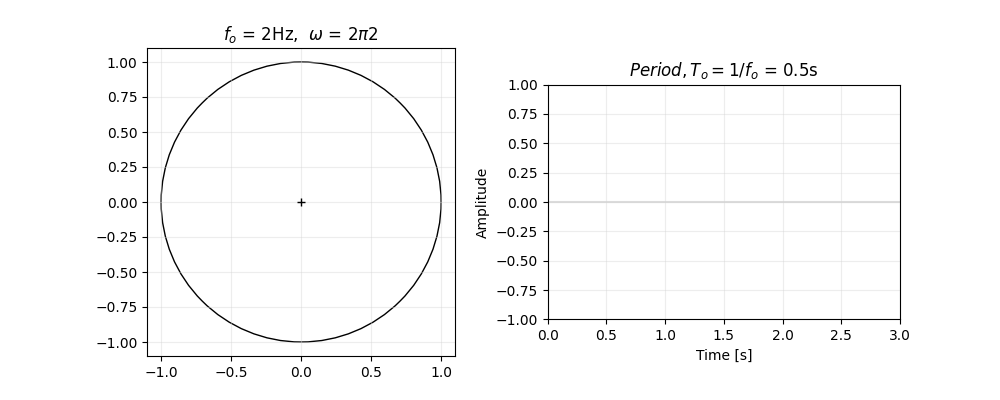

In [ ]:
#%debug

fo = 1  # frequency (Hz) (Change this to see how things vary!)

omega_o = 2*np.pi*fo  # angular frequency
T = np.abs((2*np.pi)/omega_o) # period (we use the absolute value in case the freq. is negative)
Np = 2        # number of periods
dt = 0.01
t = np.arange(0,Np*T,dt) # time
N_frames =  int(np.round((Np*T)/dt))


# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none")

# SEtting up plots,
fig, axes = plt.subplots(1,2,figsize=(10,4))

axes[0].add_patch(UnitCircle) 
axes[0].plot(xO,yO,'k+')

line_mainstem, = axes[0].plot([], [], 'k--',lw=1)
line_mainpt, = axes[0].plot([], [], 'g-o',lw=1)

line_mainstem_cos, = axes[0].plot([], [], 'orange',lw=1)
line_mainpt_cos, = axes[0].plot([], [], 'orange',marker='d',lw=1)

line_mainstem_sin, = axes[0].plot([], [], 'purple',lw=1)
line_mainpt_sin, = axes[0].plot([], [], 'purple',marker='d',lw=1)

# time_text = axes[0].text(0.02, 0.95, '', transform=ax1.transAxes)
axes[0].set_title('$f_{o}$ = '+str(fo)+'Hz,  $\omega$ = $2 \pi$'+str(fo))
axes[0].grid(color='lightgrey',alpha=0.4)
axes[0].set_aspect('equal')

line_cos, = axes[1].plot([], [], 'orange',lw=1)
line_cospt, = axes[1].plot([], [], 'orange',marker='d',lw=1)
line_sin, = axes[1].plot([], [], 'purple',lw=1)
line_sinpt, = axes[1].plot([], [], 'purple',marker='d',lw=1)
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlim(0,3)
axes[1].set_ylim(-1,1)
axes[1].set_aspect('equal')
axes[1].set_title('$Period, T_{o} = 1/f_{o}$ = '+str(T)+'s')

axes[1].grid(color='lightgrey',alpha=0.4)
axes[1].axhline(y=0, color='lightgrey',alpha=0.8)

def animate(i): # animate is in the matplotlib library that can do animations. i is a running index over which you update, in this case it is time.
 
    x = np.cos(omega_o*t[i])
    y = np.sin(omega_o*t[i])
    
    line_mainstem.set_data([xO, x],[yO, y])
    line_mainpt.set_data([x,x],[y,y])
    
    line_mainstem_cos.set_data([xO, x],[0, 0])
    line_mainpt_cos.set_data([x,x],[0,0])

    line_mainstem_sin.set_data([0, 0],[yO, y])
    line_mainpt_sin.set_data([0,0],[y,y])
    
    # # Sin and cosine waves    
    line_cos.set_data(t[0:i+1],np.cos(omega_o*t[0:i+1]))
    line_sin.set_data(t[0:i+1],np.sin(omega_o*t[0:i+1]))
    
    line_cospt.set_data([t[i],t[i]],[x,x])
    line_sinpt.set_data([t[i],t[i]],[y,y])
    
    return line_mainstem,line_mainpt, line_mainstem_cos, line_mainpt_cos, line_mainstem_sin, line_mainpt_sin, line_cos, line_sin, line_cospt, line_sinpt
    
anim = animation.FuncAnimation(fig, animate, frames=N_frames, interval=40, blit=False) # this calls the function to do the animation
plt.close(fig)

HTML(controls_css + anim.to_jshtml())


### What is a phasor?

In the previous complex exponentials, the amplitude of the sinusoidal waveforms was always equal to 1 and the corresponding phase was zero. Hence in order to generalize the complex exponential to incorporate both amplitude and phase information, we consider the following

$\begin{equation}
Ae^{j(\omega t + \phi)} = A \cos(\omega t + \phi) + jA \sin (\omega t + \phi)
\end{equation}$

where $A$ is the amplitude of the complex exponential and $\phi$ is the phase (recall from our sinusoidal model notebook, that the phase corresponds to a translation of the sinusoidal waveform along the time axis). 

Recalling the properties of exponential functions, we can also split the complex exponential into two parts as follows

$\begin{equation}
Ae^{j(\omega t + \phi)} = \underbrace{Ae^{j\phi}}_{\text{Phasor}}  \underbrace{e^{j\omega t}}_{\text{Sinusoid}} 
\end{equation}$

where we have separated the $e^{j\omega t}$ term, i.e. the complex exponential we previously discussed (amplitude = 1, phase = 0), and a second term, $Ae^{j\phi}$ which we refer to as the **phasor**. This phasor is a complex number in its exponential form that contains the remaining information about the amplitude and phase of the sinusoid and is a constant, i.e. it does not depend on time. 

If we take only the real part of the general exponential function, then we get the cosine wave with corresponding amplitude and phase, i.e

$\begin{equation}
\Re\{Ae^{j(\omega t + \phi)}\} = \Re\{Ae^{j\phi} e^{j \omega t} \}  = A \cos(\omega t + \phi) 
\end{equation}$

where $\Re\{.\}$ is an operator that takes the real part. 

Let's run the animation and observe how the cos waveform varies with different phasors. Change the values of $A$ and $\phi$ and re-run the cells to see the changes.

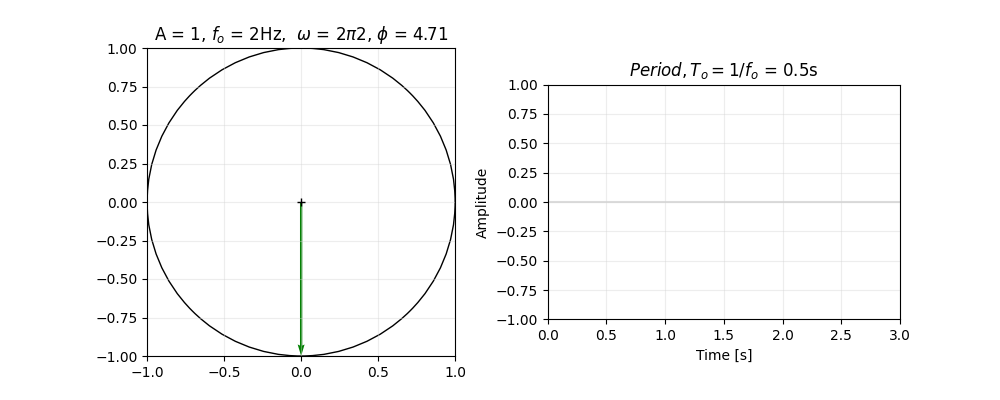

In [3]:
A = 1
phi = (3*np.pi)/2  #(Change these parameters to see how things vary!)
z_phasor = A*np.exp(1j*phi) # This is the phasor

fo = 2  # frequency (Hz) 
omega_o = 2*np.pi*fo  # angular frequency

T = np.abs((2*np.pi)/omega_o) # period (we use the absolute value in case the freq. is negative)
Np = 3        # number of periods
dt = 0.005
t = np.arange(0,Np*T,dt) # time
N_frames =  int(np.round((Np*T)/dt))


# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none")

# SEtting up plots,
fig2, axes2 = plt.subplots(1,2,figsize=(10,4))

axes2[0].add_patch(UnitCircle) 
axes2[0].plot(xO,yO,'k+')

line_mainstem2, = axes2[0].plot([], [], 'k--',lw=1)
line_mainpt2, = axes2[0].plot([], [], 'g-o',lw=1)

line_mainstem_cos2, = axes2[0].plot([], [], 'orange',lw=1)
line_mainpt_cos2, = axes2[0].plot([], [], 'orange',marker='d',lw=1)

line_mainstem_sin2, = axes2[0].plot([], [], 'purple',lw=1)
line_mainpt_sin2, = axes2[0].plot([], [], 'purple',marker='d',lw=1)

qc = axes2[0].quiver(z_phasor.real, z_phasor.imag, angles='xy', scale_units='xy',scale=1,label='phasor', color='green') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

# time_text = axes[0].text(0.02, 0.95, '', transform=ax1.transAxes)
axes2[0].set_title('A = '+str(A)+', $f_{o}$ = '+str(fo)+'Hz,  $\omega$ = $2 \pi$'+str(fo)+', $\phi$ = '+str(np.round(phi,decimals=2)))
axes2[0].grid(color='lightgrey',alpha=0.4)
axes2[0].set_aspect('equal')
axes2[0].set_xlim([-A, A])
axes2[0].set_ylim([-A, A])


line_cos2, = axes2[1].plot([], [], 'orange',lw=1)
line_cospt2, = axes2[1].plot([], [], 'orange',marker='d',lw=1)
line_sin2, = axes2[1].plot([], [], 'purple',lw=1)
line_sinpt2, = axes2[1].plot([], [], 'purple',marker='d',lw=1)

axes2[1].set_xlabel('Time [s]')
axes2[1].set_ylabel('Amplitude')
axes2[1].set_xlim(0,3)
axes2[1].set_ylim(-1,1)
axes2[1].set_aspect('equal')
axes2[1].set_title('$Period, T_{o} = 1/f_{o}$ = '+str(T)+'s')

axes2[1].grid(color='lightgrey',alpha=0.4)
axes2[1].axhline(y=0, color='lightgrey',alpha=0.8)
axes2[1].set_ylim([-A, A])



def animate2(i): # animate is in the matplotlib library that can do animations. i is a running index over which you update, in this case it is time.

    z = z_phasor*np.exp(1j*omega_o*t[i])
    
    x2 = np.real(z)
    y2 = np.imag(z)
    
    
    line_mainstem2.set_data([xO, x2],[yO, y2])
    line_mainpt2.set_data([x2,x2],[y2,y2])
    
    line_mainstem_cos2.set_data([xO, x2],[0, 0])
    line_mainpt_cos2.set_data([x2,x2],[0,0])
    
    # cosine waves    
    line_cos2.set_data(t[0:i+1],np.real(z_phasor*np.exp(1j*omega_o*t[0:i+1])))
    line_cospt2.set_data([t[i],t[i]],[x2,x2])



anim2 = animation.FuncAnimation(fig2, animate2, frames=N_frames, interval=20, blit=False) # this calls the function to do the animation


### Adding sinusoids

The reason for using complex sinusoids is that it greatly simplifies some of the math when working with them since operations such as differentiation and integration become very easy. It also allows us to make the addition of two sinusoids with the same frequency quite simple, again with a nice graphical interpretation. 

Let's consider the addition of two sinusoids, each with different amplitude and phase, but with the same frequency (omega is the same for both)

\begin{align}
A_{1} \cos(\omega t + \phi_{1}) + A_{2} \cos(\omega t + \phi_{2}) 
\end{align}

The phasors for each of these sinusoids are 
\begin{align}
A_{1} \cos(\omega t + \phi_{1}) &\rightarrow A_{1} e^{j\phi_{1}} \nonumber \\
A_{2} \cos(\omega t + \phi_{2}) &\rightarrow A_{2} e^{j\phi_{2}} 
\end{align}

And hence we can do the addition using complex exponentials as follows

\begin{align}
A_{1} \cos(\omega t + \phi_{1}) + A_{2} \cos(\omega t + \phi_{2}) &= \Re\{A_{1} e^{j\phi_{1}} e^{j\omega t}\} + \Re\{A_{2} e^{j\phi_{2}} e^{j\omega t}\} \nonumber\\
%
&= \Re\{A_{1} e^{j\phi_{1}} e^{j\omega t} + A_{2} e^{j\phi_{2}} e^{j\omega t}\} \nonumber\\
&= \Re\{ (A_{1} e^{j\phi_{1}} +  A_{2} e^{j\phi_{2}}) e^{j\omega t}\} \nonumber\\
\end{align}

At this point we can already see that the sum of the two sinusoids is the real part of the sum of the corresponding phasors multiplied with the complex exponential. We can simplify the expression a bit further however, since we can recognize that the sum of the phasors, $(A_{1} e^{j\phi_{1}} +  A_{2} e^{j\phi_{2}})$, will correspond to another complex number that can also be expressed as a phasor. 

If we denote $z_{sum} = (A_{1} e^{j\phi_{1}} +  A_{2} e^{j\phi_{2}})$, then from using your knowledge on complex numbers, you can show that $z_{sum} = |z_{sum}| e^{j \angle (z_{sum})}$, where we recall that $ |z_{sum}|$ is the modulus of $z_{sum}$ and $\angle (z_{sum})$ is the argument of $z_{sum}$.

And so continuing with the addition of the sinusoids, we have

\begin{align}
A_{1} \cos(\omega t + \phi_{1}) + A_{2} \cos(\omega t + \phi_{2}) &= \Re\{ (A_{1} e^{j\phi_{1}} +  A_{2} e^{j\phi_{2}}) e^{j\omega t}\} \nonumber\\
&= \Re\{ (|z_{sum}| e^{j \angle (z_{sum})}) e^{j\omega t}\} \nonumber\\
&= \Re\{ |z_{sum}| e^{j (\omega t + \angle (z_{sum})}\} \nonumber\\
&=  |z_{sum}| \cos\left(\omega t + \angle (z_{sum})\right)  \nonumber\\
\end{align}

So to add two sinusoids of same frequency, all we need to do is find the modulus and argument of the sum of the phasors defining the sinusoids and that's it!

How about another animation? :)
(For this animation, if things start to get strange, just restart the kernal and run it again (you may have to re-run the very first cell of this notebook to re-import the packages)). I know the code seems a bit long (probably not even efficient!), but it's simply because we now have 3 sets of complex numbers to plot, so the length of the code is just due to repetition, nothing especially new being introduced here. Nevertheless, play around with the different phasors and have a look at the sum. The green and orange lines are due to the individual phasors and the brown line is the sum of the two sinusoids. 

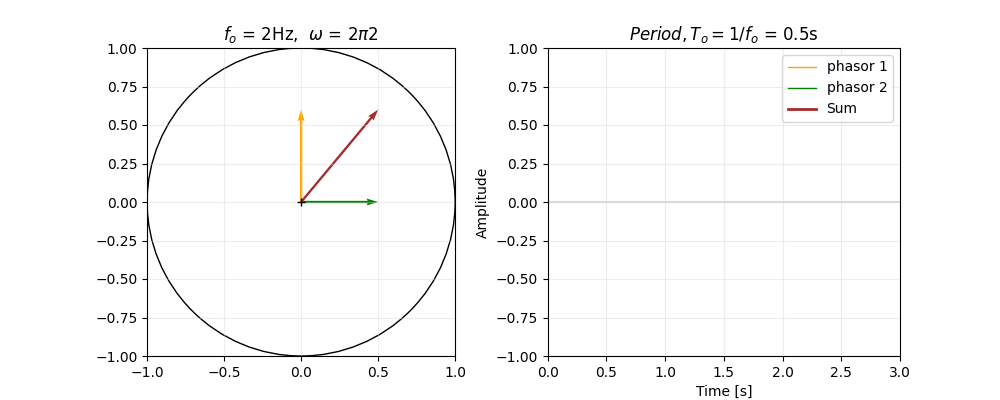

In [4]:
# Define the 1st phasor
A1 = 0.6
phi1 = np.pi/2
z1_phasor = A1*np.exp(1j*phi1) 

# Define the 2nd phasor
A2 = 0.5
phi2 = 0 
z2_phasor = A2*np.exp(1j*phi2) 

z_sum = z1_phasor + z2_phasor
z_sum_modulus = np.abs(z_sum)
z_sum_arg = np.angle(z_sum)

# complex exponential parameters
fo = 2  # frequency (Hz) 
omega_o = 2*np.pi*fo  # angular frequency

T = np.abs((2*np.pi)/omega_o) # period (we use the absolute value in case the freq. is negative)
Np = 3        # number of periods
dt = 0.005
t = np.arange(0,Np*T,dt) # time
N_frames =  int(np.round((Np*T)/dt))

#
xylims = 1

# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none")

# SEtting up plots - we need to include a few more lines for the various plots.
fig3, axes = plt.subplots(1,2,figsize=(10,4))

axes[0].add_patch(UnitCircle) 
axes[0].plot(xO,yO,'k+')

line_mainstem3, = axes[0].plot([], [],'k--',lw=1,alpha=0.3)
line_mainpt3, = axes[0].plot([], [], color='orange', marker='o',lw=1,alpha=0.3)
line2_mainstem3, = axes[0].plot([], [],'k--',lw=1,alpha=0.3)
line2_mainpt3, = axes[0].plot([], [], color='green', marker='o',lw=1,alpha=0.3)
line3_mainstem3, = axes[0].plot([], [],'k--',lw=1,alpha=0.3)
line3_mainpt3, = axes[0].plot([], [], color='brown', marker='o',lw=1,alpha=0.3)

line_mainstem_cos3, = axes[0].plot([], [], 'orange',lw=1)
line_mainpt_cos3, = axes[0].plot([], [], 'orange',marker='d',lw=1)
line2_mainstem_cos3, = axes[0].plot([], [], 'green',lw=1)
line2_mainpt_cos3, = axes[0].plot([], [], 'green',marker='d',lw=1)
line3_mainstem_cos3, = axes[0].plot([], [], 'brown',lw=1)
line3_mainpt_cos3, = axes[0].plot([], [], 'brown',marker='d',lw=1)



# plot phasors
qc = axes[0].quiver(z1_phasor.real, z1_phasor.imag, angles='xy', scale_units='xy',scale=1,label='phasor', color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qc2 = axes[0].quiver(z2_phasor.real, z2_phasor.imag, angles='xy', scale_units='xy',scale=1,label='phasor', color='green') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qcsum = axes[0].quiver(z_sum.real, z_sum.imag, angles='xy', scale_units='xy',scale=1,label='sum', color='brown') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)


# time_text = axes[0].text(0.02, 0.95, '', transform=ax1.transAxes)
time_text = axes[0].text(1, 1.05, '', transform=axes[0].transAxes)
axes[0].set_title('$f_{o}$ = '+str(fo)+'Hz,  $\omega$ = $2 \pi$'+str(fo))
axes[0].grid(color='lightgrey',alpha=0.4)
axes[0].set_aspect('equal')

max_amp = np.max([A1,A2,z_sum_modulus]) # see what's the maximum amplitude to scale axes accordingly
axes[0].set_xlim([-xylims, xylims])
axes[0].set_ylim([-xylims, xylims])


line_cos3, = axes[1].plot([], [], 'orange',lw=1,label='phasor 1')
line_cospt3, = axes[1].plot([], [], 'orange',marker='d',lw=1)
# additional lines for additional terms
line2_cos3, = axes[1].plot([], [], 'green',lw=1,label='phasor 2')
line2_cospt3, = axes[1].plot([], [], 'green',marker='d',lw=1)
line3_cos3, = axes[1].plot([], [], 'brown',lw=2,label='Sum')
line3_cospt3, = axes[1].plot([], [], 'brown',marker='d',lw=1)


axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlim(0,3)
axes[1].set_ylim(-1,1)
# axes[1].set_aspect('equal')
axes[1].set_title('$Period, T_{o} = 1/f_{o}$ = '+str(T)+'s')

axes[1].grid(color='lightgrey',alpha=0.4)
axes[1].axhline(y=0, color='lightgrey',alpha=0.8)
axes[1].set_ylim([-xylims, xylims])
axes[1].legend(loc='upper right')


    
    
def animate(i): # animate is in the matplotlib library that can do animations. i is a running index over which you update, in this case it is time.

    
    # For phasor 1
    z = z1_phasor*np.exp(1j*omega_o*t[i])
    x1 = np.real(z)
    y1 = np.imag(z)
    line_mainstem3.set_data([xO, x1],[yO, y1])
    line_mainpt3.set_data([x1,x1],[y1,y1])
    
    line_mainstem_cos3.set_data([xO, x1],[0, 0])
    line_mainpt_cos3.set_data([x1,x1],[0,0])
    
    # cosine waves    
    line_cos3.set_data(t[0:i+1],np.real(z1_phasor*np.exp(1j*omega_o*t[0:i+1])))
    line_cospt3.set_data([t[i],t[i]],[x1,x1])
    

    
    # For phasor 2
    z2 = z2_phasor*np.exp(1j*omega_o*t[i])
    x2 = np.real(z2)
    y2 = np.imag(z2)
    line2_mainstem3.set_data([xO, x2],[yO, y2])
    line2_mainpt3.set_data([x2,x2],[y2,y2])
    
    line2_mainstem_cos3.set_data([xO, x2],[0, 0])
    line2_mainpt_cos3.set_data([x2,x2],[0,0])
    
    # cosine waves    
    line2_cos3.set_data(t[0:i+1],np.real(z2_phasor*np.exp(1j*omega_o*t[0:i+1])))
    line2_cospt3.set_data([t[i],t[i]],[x2,x2])
    

    # For the sum
    z3 = z_sum_modulus*np.exp(1j*(omega_o*t[i] + z_sum_arg)) # I could have simply multiplied by z_sum, but wanted to show you that the formula we derived above holds.
    x3 = np.real(z3)
    y3 = np.imag(z3)
    line3_mainstem3.set_data([xO, x3],[yO, y3])
    line3_mainpt3.set_data([x3,x3],[y3,y3])
    
    line3_mainstem_cos3.set_data([xO, x3],[0, 0])
    line3_mainpt_cos3.set_data([x3,x3],[0,0])
    
    time_text.set_text('t = '+str(np.round(t[i],decimals=2))+' s')
    
    # cosine waves    
    line3_cos3.set_data(t[0:i+1],np.real(z_sum_modulus*np.exp(1j*(omega_o*t[0:i+1] + z_sum_arg))))
    line3_cospt3.set_data([t[i],t[i]],[x3,x3])
    

    

anim = animation.FuncAnimation(fig3, animate, frames=N_frames, interval=20, blit=False) # this calls the function to do the animation

